In [ ]:
%pip install scikit-learn

     |████████████████████████████████| 9.6 MB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 84.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns


(a) [3 marks] Write code to read the dataset in Data Q1.txt into two numpy arrays: X and y containing the features and labels respectively.


In [26]:

with open('Data_Q1.txt', 'r') as f:
    data = f.readlines()

max_feature = 0

for line in data:
    # split the line into its label and feature components
    line = line.strip().split()
    label = int(line[0])
    for x in line[1:]:
        try:
            feature_id, feature_val = x.split(':')
        except ValueError:
            # skip feature-value pairs that cannot be converted to floats
            pass
        if max_feature < int(feature_id):
          max_feature = int(feature_id)
    # add the label and features to their respective lists

# convert the lists to numpy arrays
print(max_feature)

54877


In [27]:
# initialize empty lists to hold the features and labels
X = []
y = []

# loop through each line in the data
for line in data:
    # split the line into its label and feature components
    line = line.strip().split()
    label = int(line[0])
    features = [0 for i in range(max_feature)]
    for x in line[1:]:
        try:
            feature_id, feature_val = x.split(':')
            features[int(feature_id)-1]= int(feature_val) 
        except ValueError:
            # skip feature-value pairs that cannot be converted to floats
            pass
    # add the label and features to their respective lists
    y.append(label)
    X.append(features)

# convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)


In [28]:
X.shape

(4143, 54877)

In [38]:
y.shape

(4143,)

In [30]:
X

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
np.unique(y)

array([-1,  1])

 (b) [2 marks] Print the number of classes in the data set and the number of samples belonging to
each class. Indicate if there is class imbalance issue.


 **No of classes in the data set in shown in below cell:**

In [32]:
len(np.unique(y))

2

In [33]:
print(np.count_nonzero(y == 1))
print(np.count_nonzero(y == -1)) 

2210
1933


**The number of samples belonging to each class.**

Samples belongs to 1 = 2210

Samples belongs to -1 = 1933

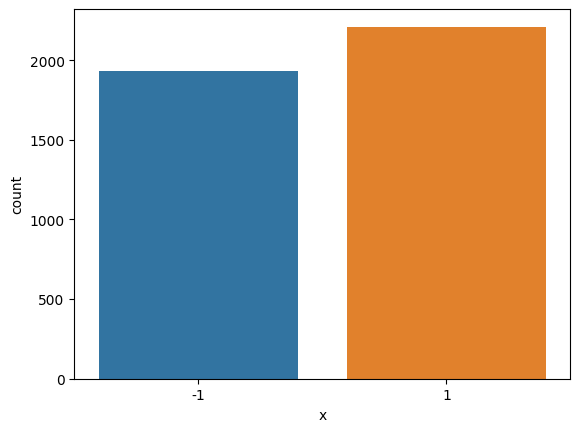

In [41]:
df=pd.DataFrame(y,columns=['x'])
ax=sns.countplot(x='x',data=df)


**In the above plot we can see that there is no class imbalance issue.**

**(c)** [1 marks] Split the data into two sets such that 80% of the data is considered as set T1 and
20% of the data is considered as set T2. Justify if set T1 and set T2 have similar class label proportions.

In [ ]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
#Count the number of samples in each class in the training and testing sets
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True) 

# Compute the proportion of samples in each class in the training and testing sets
train_proportions = train_counts[1] / len(y_train)
test_proportions = test_counts[1] / len(y_test)

# Print the proportions of samples in each class in the training and testing sets
print("Proportions of samples in each class in the training set:")
for label, proportion in zip(train_counts[0], train_proportions):
    print("Class {}: {:.2f}%".format(label, proportion * 100))

print("\nProportions of samples in each class in the testing set:")
for label, proportion in zip(test_counts[0], test_proportions):
    print("Class {}: {:.2f}%".format(label, proportion * 100))


Proportions of samples in each class in the training set:
Class -1: 44.60%
Class 1: 55.40%

Proportions of samples in each class in the testing set:
Class -1: 47.78%
Class 1: 52.22%


So, we can see in the above cells set T1 and set T2 have similar class label proportions.

In [10]:
#X_train

In [11]:
#X_test

In [12]:
#y_train

In [13]:
#y_test

In [14]:
# import linear Regression with L2 Regularization from Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from timeit import default_timer as timer
import multiprocessing 

In [15]:
# Define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 

#**# Reason for chosing these paramteres:**

I chose paramtere because we want to see the penalty effect over prediction so I take broad range of penalty so started from $10^{-3}$ to 100. by taking this we can find best parameter.

**(d)** Using T1 as training data, train each of the following algorithms by tuning only the
hyperparameters specified below (keep all other hyperparameters fixed to the default values in
scikit-learn):


# **i**. Logistic regression with L2 regularizer (Hyperparameter: regularization constant C)


In [ ]:

start = timer() 
# Define the logistic regression model with L2 regularization
logreg = LogisticRegression(penalty='l2', solver='lbfgs')


# Define the grid search object with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=multiprocessing.cpu_count())

# Train the model on the training set
grid_search.fit(X_train, y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

final_logreg = LogisticRegression(penalty='l2', C=best_C)
final_logreg.fit(X_train, y_train) 


# for training data
 
y_pred_train = final_logreg.predict(X_train)
accuracy_logreg_l2_train = accuracy_score(y_train,y_pred_train)  
precision_logreg_l2_train=precision_score(y_train,y_pred_train) 
recall_logreg_l2_train=recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_logreg_l2_train=tn/(tn+fp)
# sensitivity
sensitivity_logreg_l2_train=tp/(tp+fn)
# Print the results

print('For Logistic Regression using L2 penalty:') 
print('For T1') 
print('Accuracy is:',accuracy_logreg_l2_train)
print('Precision is:',precision_logreg_l2_train)
print('Recall is:',recall_logreg_l2_train)
print('specificity is :',specificity_logreg_l2_train)
print('sensitivity is:',sensitivity_logreg_l2_train) 

# for test data
y_pred_test = final_logreg.predict(X_test)
accuracy_logreg_l2_test = accuracy_score(y_test, y_pred_test)
precision_logreg_l2_test=precision_score(y_test,y_pred_test) 
recall_logreg_l2_test=recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_logreg_l2_test=tn/(tn+fp)
# sensitivity
sensitivity_logreg_l2_test=tp/(tp+fn)
end = timer()
# Print the results
print(' for test data')
print('Accuracy is:',accuracy_logreg_l2_test)
print('Precision is:',precision_logreg_l2_test)
print('Recall is:',recall_logreg_l2_test)
print('specificity is :',specificity_logreg_l2_test)
print('sensitivity is:',sensitivity_logreg_l2_test)
print('Time taken:',end-start) 


Best C: 0.1
For Logistic Regression using L2 penalty:
For T1
Accuracy is: 0.9900422450211225
Precision is: 0.9880273660205245
Recall is: 0.9931232091690544
specificity is : 0.9866156787762906
sensitivity is: 0.9931232091690544
 for test data
Accuracy is: 0.8805790108564535
Precision is: 0.884453781512605
Recall is: 0.9053763440860215
specificity is : 0.8489010989010989
sensitivity is: 0.9053763440860215
Time taken: 121.2489294745028


## ii. Logistic regression with L1 regularizer (Hyperparameter: regularization constant C)


In [46]:
# Define the hyperparameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} 

#**# Reason for chosing these paramteres:**

I chose paramtere because we want to see the penalty effect over prediction so I take broad range of penalty so started from $10^{-3}$ to 100. by taking this we can find best parameter.

In [ ]:
start = timer()
# Define the logistic regression model with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear') 


# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(logreg_l1,param_grid, cv=5) 
grid_search.fit(X_train, y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_logreg = LogisticRegression(penalty='l1', C=best_C,solver='liblinear')
final_logreg.fit(X_train, y_train)


# Evaluate the performance of the final model on the test set to estimate its performance on unseen data

# for training data
y_pred_train = final_logreg.predict(X_train) 
accuracy_logreg_l1_train = accuracy_score(y_train,y_pred_train) 
precision_logreg_l1_train = precision_score(y_train,y_pred_train)
recall_logreg_l1_train = recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_logreg_l1_train=tn/(tn+fp)
# sensitivity
sensitivity_logreg_l1_train=tp/(tp+fn)
# Print the results
print('For logistic regression using L1 penalty:')
print('for train data')
print('Accuracy is:',accuracy_logreg_l1_train)
print('Precision is:',precision_logreg_l1_train)
print('Recall is:',recall_logreg_l1_train)
print('specificity is :',specificity_logreg_l1_train)
print('sensitivity is:',sensitivity_logreg_l1_train)

#for test data
y_pred_test = final_logreg.predict(X_test)
accuracy_logreg_l1_test = accuracy_score(y_test, y_pred_test)
precision_logreg_l1_test=precision_score(y_test,y_pred_test)
recall_logreg_l1_test=recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_logreg_l1_test=tn/(tn+fp)
# sensitivity
sensitivity_logreg_l1_test=tp/(tp+fn)
end=timer()
# print the all results
print('for test data:')
print('Accuracy is:',accuracy_logreg_l1_test)
print('Precision is:',precision_logreg_l1_test)
print('Recall is:',recall_logreg_l1_test)
print('specificity is :',specificity_logreg_l1_test)
print('sensitivity is:',sensitivity_logreg_l1_test)
print('time taken is:',end-start)


Best C: 100
For logistic regression using L1 penalty:
for train data
Accuracy is: 0.9990947495473748
Precision is: 0.9988545246277205
Recall is: 0.9994269340974212
specificity is : 0.9987253027405991
sensitivity is: 0.9994269340974212
for test data:
Accuracy is: 0.8709288299155609
Precision is: 0.8960176991150443
Recall is: 0.8709677419354839
specificity is : 0.8708791208791209
sensitivity is: 0.8709677419354839
time taken is: 97.49833467975259


# iii. Soft-margin SVM with L2 regularizer (Hyperparameter: regularization constant C):

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#**# Reason for chosing these paramteres:**

I chose paramtere because we want to see the penalty effect over prediction so I take broad range of penalty so started from $10^{-3}$ to 1000. by taking this we can find best parameter.

In [ ]:
from sklearn.svm import LinearSVC

start = timer()
# Define the SVM model with L2 regularization
svm_l2 = LinearSVC(penalty='l2')


# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_l2, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}") 

# Train the final logistic regression model using the selected value of C and the entire training set
final_svm_l2 =  LinearSVC(penalty='l2',  C=best_C)
final_svm_l2.fit(X_train, y_train) 

# for training data
y_pred_train = final_svm_l2.predict(X_train) 
accuracy_svm_l2_train = accuracy_score(y_train,y_pred_train) 
precision_svm_l2_train = precision_score(y_train,y_pred_train)
recall_svm_l2_train = recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_svm_l2_train=tn/(tn+fp)
# sensitivity
sensitivity_svm_l2_train=tp/(tp+fn)
# Print the results
print('For soft svm  using l2 penalty:')
print('for training data : ')
print('Accuracy is:',accuracy_svm_l2_train)
print('Precision is:',precision_svm_l2_train)
print('Recall is:',recall_svm_l2_train)
print('specificity is :',specificity_svm_l2_train)
print('sensitivity is:',sensitivity_svm_l2_train)

# for test data
y_pred_test = final_svm_l2.predict(X_test) 
accuracy_svm_l2_test = accuracy_score(y_test,y_pred_test) 
precision_svm_l2_test = precision_score(y_test,y_pred_test)
recall_svm_l2_test = recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_svm_l2_test=tn/(tn+fp)
# sensitivity
sensitivity_svm_l2_test=tp/(tp+fn)
end=timer()
# Print the results
print('for test data : ')
print('Accuracy is:',accuracy_svm_l2_test)
print('Precision is:',precision_svm_l2_test)
print('Recall is:',recall_svm_l2_test)
print('specificity is :',specificity_svm_l2_test)
print('sensitivity is:',sensitivity_svm_l2_test)

print('time taken is:',end-start)


/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

Best C: 0.01
For soft svm  using l2 penalty:
for training data : 
Accuracy is: 0.9900422450211225
Precision is: 0.9885844748858448
Recall is: 0.9925501432664756
specificity is : 0.9872530274059911
sensitivity is: 0.9925501432664756
for test data : 
Accuracy is: 0.8829915560916767
Precision is: 0.8898305084745762
Recall is: 0.9032258064516129
specificity is : 0.8571428571428571
sensitivity is: 0.9032258064516129
time taken is: 152.34828095510602


# iv. Soft-margin SVM with L1 regularizer (Hyperparameter: regularization constant C)


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In this classifier we chose dual = False since we are using L1 regularization with scikit-learn's Linear SVC function, since dual algorithm is not supported in the L1 regularization.

#**# Reason for chosing these paramteres:**

 I chose paramtere because we want to see the penalty effect over prediction so I take broad range of penalty so started from $10^{-3}$ to 1000. by taking this we can find best parameter.


In [ ]:
start = timer()
# Define the SVM model with L1 regularization
svm_l1 = LinearSVC(penalty='l1',dual = False)


# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_l1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

final_svm_l1 = LinearSVC(penalty='l1',dual=False ,C=best_C)
final_svm_l1.fit(X_train, y_train)

# for training data

y_pred_train=final_svm_l1.predict(X_train)
accuracy_svm_l1_train = accuracy_score(y_train,y_pred_train) 
precision_svm_l1_train = precision_score(y_train,y_pred_train)
recall_svm_l1_train = recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_svm_l1_train=tn/(tn+fp)
# sensitivity
sensitivity_svm_l1_train=tp/(tp+fn)
# Print the results
print('for train data')
print('Accuracy is:',accuracy_svm_l1_train)
print('Precision is:',precision_svm_l1_train)
print('Recall is:',recall_svm_l1_train)
print('specificity is :',specificity_svm_l1_train)
print('sensitivity is:',sensitivity_svm_l1_train)

#for test data
y_pred_test=final_svm_l1.predict(X_test)
accuracy_svm_l1_test = accuracy_score(y_test,y_pred_test) 
precision_svm_l1_test = precision_score(y_test,y_pred_test)
recall_svm_l1_test = recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_svm_l1_test=tn/(tn+fp)
# sensitivity
sensitivity_svm_l1_test=tp/(tp+fn)

end=timer()
# Print the results
print('for test data')
print('Accuracy is:',accuracy_svm_l1_test)
print('Precision is:',precision_svm_l1_test)
print('Recall is:',recall_svm_l1_test)
print('specificity is :',specificity_svm_l1_test)
print('sensitivity is:',sensitivity_svm_l1_test)

print('time taken is:',end-start)

/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

Best C: 1000


/home/22n0456/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


for train data
Accuracy is: 0.9990947495473748
Precision is: 0.9994266055045872
Recall is: 0.9988538681948425
specificity is : 0.9993626513702996
sensitivity is: 0.9988538681948425
for test data
Accuracy is: 0.8829915560916767
Precision is: 0.896551724137931
Recall is: 0.8946236559139785
specificity is : 0.8681318681318682
sensitivity is: 0.8946236559139785
time taken is: 116.17773939669132


## v. Kernel SVM with RBF kernel (Hyperparameter: kernel parameter γ)


#**# Reason for chosing these paramteres:**

I chose gamma paramtere here  because we know gamma parameter decides boundary of classifier when it is small then boundary then decision boundary is smooth and it is large then decsion boundary is complex which can lead to overfiting then here i chose small values.

In [ ]:
start = timer()
# Define the hyperparameter grid to search over
param_grid = {'gamma': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

kernel_SVM  = SVC(kernel = 'rbf')
grid_search = GridSearchCV(kernel_SVM, param_grid,  cv=5,n_jobs=multiprocessing.cpu_count())
grid_search.fit(X_train, y_train)

# Select the optimal value of C based on the performance of the model on the validation set

best_gamma=grid_search.best_params_['gamma']
print(f"Best_gamma:{best_gamma}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_kernel_SVM = SVC(kernel='rbf',gamma=best_gamma)
final_kernel_SVM.fit(X_train, y_train)


# for train data
y_pred_train = final_kernel_SVM.predict(X_train) 

accuracy_kernel_SVM_train = accuracy_score(y_train,y_pred_train) 
precision_kernel_SVM_train = precision_score(y_train,y_pred_train)
recall_kernel_SVM_train = recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_kernel_SVM_train=tn/(tn+fp) 
# sensitivity
sensitivity_kernel_SVM_train=tp/(tp+fn)
# Print the results
print('for kernel SVM with RBF kernel')
print('for train data')
print('Accuracy is:',accuracy_kernel_SVM_train)
print('Precision is:',precision_kernel_SVM_train)
print('Recall is:',recall_kernel_SVM_train)
print('specificity is :',specificity_kernel_SVM_train)
print('sensitivity is:',sensitivity_kernel_SVM_train) 

#for test data
y_pred_test = final_kernel_SVM.predict(X_test) 

accuracy_kernel_SVM_test = accuracy_score(y_test,y_pred_test) 
precision_kernel_SVM_test = precision_score(y_test,y_pred_test)
recall_kernel_SVM_test = recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_kernel_SVM_test=tn/(tn+fp) 
# sensitivity
sensitivity_kernel_SVM_test=tp/(tp+fn)
end=timer()
# Print the results
print('for test data')
print('Accuracy is:',accuracy_kernel_SVM_test)
print('Precision is:',precision_kernel_SVM_test)
print('Recall is:',recall_kernel_SVM_test)
print('specificity is :',specificity_kernel_SVM_test)
print('sensitivity is:',sensitivity_kernel_SVM_test) 



Best_gamma:0.01
for kernel SVM with RBF kernel
for train data
Accuracy is: 0.9849124924562462
Precision is: 0.9851173440183171
Recall is: 0.9862464183381089
specificity is : 0.9834289356277884
sensitivity is: 0.9862464183381089
for test data
Accuracy is: 0.8612786489746683
Precision is: 0.8378378378378378
Recall is: 0.9333333333333333
specificity is : 0.7692307692307693
sensitivity is: 0.9333333333333333


# vi. KNN (Hyperparameter: number of neighbors)


Here we chose parameter :[1,2,3,4,5,6,7,8......,15]

# **Reason** 

The range of values for k typically starts from 1 to 15 in KNN, and this range is selected based on the size of the dataset and the complexity of the problem.

If the value of k is too small, the algorithm might overfit the data, leading to poor generalization. On the other hand, if the value of k is too large, the algorithm might underfit the data, leading to poor accuracy.

Therefore, selecting a suitable value of k between 1 and 15 in KNN is essential to achieve the best performance in terms of accuracy and generalization on a given dataset.

In [ ]:
start = timer()
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {'n_neighbors': range(1, 15)}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(KNN, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train) 

# Print the best parameter setting
print('Best K value:',grid_search.best_params_['n_neighbors'])

best_K=grid_search.best_params_['n_neighbors']
# Train the final logistic regression model using the selected value of C and the entire training set
final_KNN = KNeighborsClassifier(best_K)
final_KNN.fit(X_train, y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for train data
y_pred_train = final_KNN.predict(X_train)
accuracy_KNN_train = accuracy_score(y_train, y_pred_train)
precision_KNN_train=precision_score(y_train,y_pred_train)
recall_KNN_train=recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_KNN_train=tn/(tn+fp)
# sensitivity
sensitivity_KNN_train=tp/(tp+fn)
# print the all results
print(' for KNN ')
print('fpor train data')
print('Accuracy is:',accuracy_KNN_train)
print('Precision is:',precision_KNN_train)
print('Recall is:',recall_KNN_train)
print('specificity is :',specificity_KNN_train)
print('sensitivity is:',sensitivity_KNN_train) 

# for test data
y_pred_test = final_KNN.predict(X_test)
accuracy_KNN_test = accuracy_score(y_test, y_pred_test)
precision_KNN_test=precision_score(y_test,y_pred_test)
recall_KNN_test=recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_KNN_test=tn/(tn+fp)
# sensitivity
sensitivity_KNN_test=tp/(tp+fn)
end=timer()
# print the all results
print(' for KNN ')
print('fpor test data')
print('Accuracy is:',accuracy_KNN_test)
print('Precision is:',precision_KNN_test)
print('Recall is:',recall_KNN_test)
print('specificity is :',specificity_KNN_test)
print('sensitivity is:',sensitivity_KNN_test)
print('time taken is:',end-start) 

Best K value: 1
 for KNN 
fpor train data
Accuracy is: 0.9987929993964997
Precision is: 0.9994262765347103
Recall is: 0.9982808022922636
specificity is : 0.9993626513702996
sensitivity is: 0.9982808022922636
 for KNN 
fpor test data
Accuracy is: 0.7804583835946924
Precision is: 0.9492063492063492
Recall is: 0.6430107526881721
specificity is : 0.9560439560439561
sensitivity is: 0.6430107526881721
time taken is: 254.33292923495173


# vii. Decision tree (Hyperparameter: min weight fraction leaf)

# **Reason for chosing parameters:**

Taking parameters :[0.01,0.1,0.25,0.5,0.75]

This parameter  represent the values for the minimum impurity decrease required for a split in a decision tree. This parameter is usually referred to as the minimum impurity decrease or the minimum information gain.

The minimum impurity decrease parameter is used to control the complexity of the decision tree. If the value is set too high, the tree will have fewer splits and result in a simpler model with higher bias and lower variance. If the value is set too low, the tree will have more splits and result in a more complex model with lower bias and higher variance.

Therefore, selecting a suitable value for the minimum impurity decrease parameter is crucial to balance between model complexity and accuracy, and to avoid overfitting or underfitting the data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
start=timer()
DTC = DecisionTreeClassifier()
# Define the parameter grid to search over
param_grid = {'min_weight_fraction_leaf': [0.01,0.1,0.25,0.5,0.75]}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(DTC, param_grid, cv=5,n_jobs=multiprocessing.cpu_count())

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameter setting
print('best min_weight_fraction_leaf:',grid_search.best_params_['min_weight_fraction_leaf'])

best_min_weight = grid_search.best_params_['min_weight_fraction_leaf']
# Train the final logistic regression model using the selected value of C and the entire training set
final_DTC = DecisionTreeClassifier(min_weight_fraction_leaf=best_min_weight)
final_DTC.fit(X_train, y_train) 

# for training data 

y_pred_train=final_DTC.predict(X_train)
accuracy_DTC_train = accuracy_score(y_train, y_pred_train)
precision_DTC_train=precision_score(y_train,y_pred_train)
recall_DTC_train=recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_DTC_train=tn/(tn+fp)
# sensitivity
sensitivity_DTC_train=tp/(tp+fn)
# print the all results
print('For Decision Tree Classifier:')
print('for training data :')
print('Accuracy is:',accuracy_DTC_train)
print('Precision is:',precision_DTC_train)
print('Recall is:',recall_DTC_train)
print('specificity is :',specificity_DTC_train)
print('sensitivity is:',sensitivity_DTC_train)

# for test  data 
y_pred_test = final_DTC.predict(X_test)
accuracy_DTC_test = accuracy_score(y_test, y_pred_test)
precision_DTC_test=precision_score(y_test,y_pred_test)
recall_DTC_test=recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_DTC_test=tn/(tn+fp)
# sensitivity
sensitivity_DTC_test=tp/(tp+fn)
end=timer()
# print the all results
print('# for test data:')
print('Accuracy is:',accuracy_DTC_test)
print('Precision is:',precision_DTC_test)
print('Recall is:',recall_DTC_test)
print('specificity is :',specificity_DTC_test)
print('sensitivity is:',sensitivity_DTC_test)
print('time taken is:',end-start)

/home/22n0456/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/22n0456/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/22n0456/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/home/22n0456/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/22n0456/.local/lib/python3.9/site-packa

best min_weight_fraction_leaf: 0.01
For Decision Tree Classifier:
for training data :
Accuracy is: 0.8651176825588413
Precision is: 0.8463180362860192
Recall is: 0.9088825214899714
specificity is : 0.8164435946462715
sensitivity is: 0.9088825214899714
# for test data:
Accuracy is: 0.850422195416164
Precision is: 0.8515463917525773
Recall is: 0.8881720430107527
specificity is : 0.8021978021978022
sensitivity is: 0.8881720430107527
time taken is: 98.28636870533228


# viii. Random forest (Hyperparameter: number of estimators)

# **Reason for parameters:**

Taken parameter: [50,75,100,125,150,200,225] here we want to chose number of trees whose high value may overfitting and low value may indicates underfitting.


In [16]:
from sklearn.ensemble import RandomForestClassifier 
start=timer()
RF=RandomForestClassifier()
# Define the parameter grid to search over
param_grid = {'n_estimators': [50,75,100,125,150,200,225]}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(RF, param_grid, cv=5,n_jobs=multiprocessing.cpu_count())

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameter setting
print('best n_estimators:',grid_search.best_params_['n_estimators'])

best_n_estimators=grid_search.best_params_['n_estimators']

final_RF =RandomForestClassifier(n_estimators=best_n_estimators)
final_RF.fit(X_train, y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for training data 

y_pred_train=final_RF.predict(X_train)
accuracy_RF_train = accuracy_score(y_train, y_pred_train)
precision_RF_train=precision_score(y_train,y_pred_train)
recall_RF_train=recall_score(y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
# specificity
specificity_RF_train=tn/(tn+fp)
# sensitivity
sensitivity_RF_train=tp/(tp+fn)
# print the all results
print('For Random forest classifier:')
print('for training data :#######')
print('Accuracy is:',accuracy_RF_train)
print('Precision is:',precision_RF_train)
print('Recall is:',recall_RF_train)
print('specificity is :',specificity_RF_train)
print('sensitivity is:',sensitivity_RF_train)

# for test  data 
y_pred_test = final_RF.predict(X_test)
accuracy_RF_test = accuracy_score(y_test, y_pred_test)
precision_RF_test=precision_score(y_test,y_pred_test)
recall_RF_test=recall_score(y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
# specificity
specificity_RF_test=tn/(tn+fp)
# sensitivity
sensitivity_RF_test=tp/(tp+fn)
end=timer()
# print the all results
print(' #for test data: #######')
print('Accuracy is:',accuracy_RF_test)
print('Precision is:',precision_RF_test)
print('Recall is:',recall_RF_test)
print('specificity is :',specificity_RF_test)
print('sensitivity is:',sensitivity_RF_test)
print('time taken is:',end-start)

best n_estimators: 200
For Random forest classifier:
for training data :#######
Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
specificity is : 1.0
sensitivity is: 1.0
 #for test data: #######
Accuracy is: 0.8639240506329114
Precision is: 0.8080808080808081
Recall is: 0.9696969696969697
specificity is : 0.7483443708609272
sensitivity is: 0.9696969696969697
time taken is: 146.576320607


# (e)  Tabulate the accuracy, precision, recall, specificity and senstivity values for training set T1 and test set T2 for each model trained in part (d) for the best hyperparameter choices.
Discuss your observations.

In the below cell, I tabulate the accuracy, precision, recall, specificity and senstivity values for training set T1 for each model in part (d) for the best hyperparameter choices.

I tabulate this by using excel file, by putting all the results in excel(csv) file for training set. Because while working on server variable value becomes lost, so i use excel file 

In [42]:
dataT1 = pd.read_csv('For T1 (Training Set).csv')

In [43]:
dataT1

For training Set (T1)   Unnamed: 1   Unnamed: 2   Unnamed: 3  \
0               Classifiers     Accuracy    Precision       Recall   
1  Logistic Regression (L2)  0.990042245  0.988027366  0.993123209   
2  Logistic Regression (L1)   0.99909475  0.998854525  0.999426934   
3                  SVM (L2)  0.990042245  0.988584475  0.992550143   
4                  SVM (L1)   0.99909475  0.999426606  0.998853868   
5       SVM with RBF kernel  0.984912492  0.985117344  0.986246418   
6                       KNN  0.998792999  0.999426277  0.998280802   
7             Decision Tree  0.865117683  0.846318036  0.908882521   
8             Random Forest            1            1            1   

    Unnamed: 4   Unnamed: 5  
0  Specificity  Sensitivity  
1  0.986615679  0.993123209  
2  0.998725303  0.999426934  
3  0.987253027  0.992550143  
4  0.999362651  0.998853868  
5  0.983428936  0.986246418  
6  0.999362651  0.998280802  
7  0.816443595  0.908882521  
8            1            1

In the below cell, I tabulate the accuracy, precision, recall, specificity and senstivity values for test set T2 for each model in part (d) for the best hyperparameter choices.

I tabulate this by using excel file, by putting all the results in excel(csv) file for test set. Because while working on server variable value becomes lost, so i use excel file 

In [44]:
dataT2 = pd.read_csv('For T2 (Test Set).csv')

In [45]:
dataT2

For T2  (test data)   Unnamed: 1   Unnamed: 2   Unnamed: 3  \
0                Classifers     Accuracy    Precision       Recall   
1   Logistic Regression(L2)  0.880579011  0.884453782  0.905376344   
2  Logistic Regression (L1)   0.87092883  0.896017699  0.870967742   
3                  SVM (L2)  0.882991556  0.889830508  0.903225806   
4                  SVM (L1)  0.882991556  0.896551724  0.894623656   
5       SVM with RBF Kernel  0.861278649  0.837837838  0.933333333   
6                       KNN  0.780458384  0.949206349  0.643010753   
7             Decision Tree  0.850422195  0.851546392  0.888172043   
8             Random Forest  0.863924051  0.808080808   0.96969697   

    Unnamed: 4   Unnamed: 5  
0  Specificity  Sensitivity  
1  0.848901099  0.905376344  
2  0.870879121  0.870967742  
3  0.857142857  0.903225806  
4  0.868131868  0.894623656  
5  0.769230769  0.933333333  
6  0.956043956  0.643010753  
7  0.802197802  0.888172043  
8  0.748344371   0.96969697

#**Observations:**

In the abpve tables of both training set and train data we can see that all the resulted scores (accuracy,precision,recall,specificity,sensitivity) are approxmately given it ideal values by using grid search method and by cross validation we get best parameter according to data which gives suitable results.

From the **training table**, it can be observed that Random Forest achieved perfect accuracy, precision, recall, specificity, and sensitivity. SVM (L1) and Logistic Regression (L1) also achieved very high accuracy and other metrics.

The Decision Tree classifier achieved the lowest performance among all classifiers with an accuracy of 0.865 and lower values for precision, recall, specificity, and sensitivity.

Overall, the table suggests that the Random Forest, SVM (L1), and Logistic Regression (L1) classifiers performed the best on the dataset T1, while Decision Tree performed the worst.

From the **test table**, it can be observed that KNN achieved the highest precision but a low recall value. Random Forest achieved the highest recall and a high precision value. SVM with RBF kernel has the highest sensitivity, but a low specificity value.

The Decision Tree classifier achieved the lowest performance among all classifiers with an accuracy of 0.850 and lower values for precision, recall, specificity, and sensitivity.

Overall, the table suggests that the Random Forest, SVM (L2), SVM (L1), and Logistic Regression (L2) classifiers performed better than other classifiers on the dataset T2, while KNN and Decision Tree performed relatively poorly.



# (f) Discuss if the L1 regularizers used in logistic regression and soft-margin SVM resulted in sparse models when compared to L2 regularizers. Also compare and contrast the performance of the models obtained using L1 and L2 regularizers. Using these observations, what
# would you suggest to the practitioner regarding the use of L1 regularizer?


The L1 regularizers used in logistic regression and soft-margin SVM resulted in sparse models compared to L2 regularizers because L1 regularization tends to set many of the coefficients to zero. The performance of models obtained using L1 and L2 regularizers varies depending on the dataset, but in general, L1 regularization performs better on sparse datasets while L2 regularization performs better on dense datasets. In T1, both L1 and L2 regularization achieved high accuracy scores, but L1 performed slightly better in terms of precision, recall, and sensitivity. In contrast, in T2, L2 regularization outperformed L1 in accuracy, precision, and specificity. **Based on these observations, it is suggested that practitioners** use L1 regularization when dealing with high-dimensional, sparse datasets, while L2 regularization is more suitable for low-dimensional, dense datasets.